In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_36047_G')

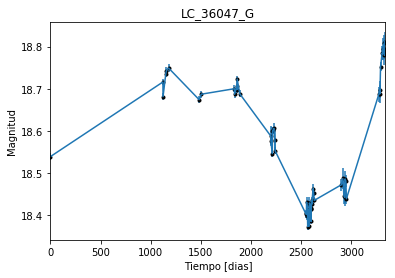

In [2]:
data = np.genfromtxt('LC_36047_G.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_36047_G')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

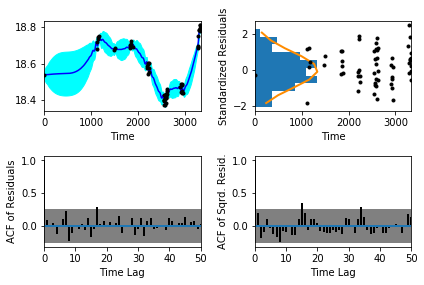

In [5]:
sample.assess_fit()

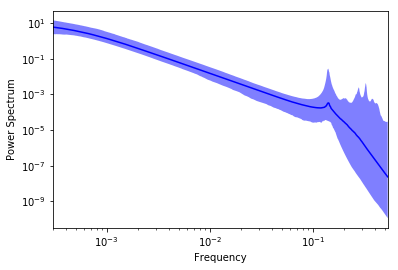

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_36047_G')

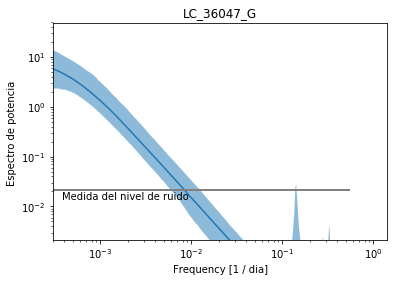

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_36047_G')

Text(0.5,1,'Prediccion , valor esperado LC_36047_G')

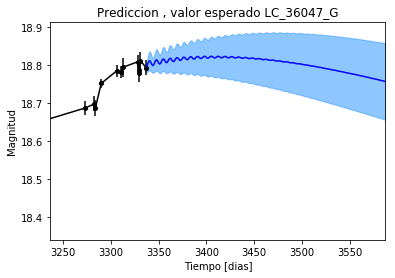

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_36047_G')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_36047_G')

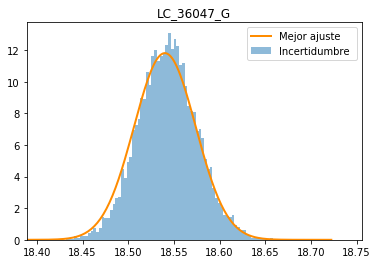

In [10]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_36047_G')

Text(0.5,1,'Interpolacion, camino simulado LC_36047_G')

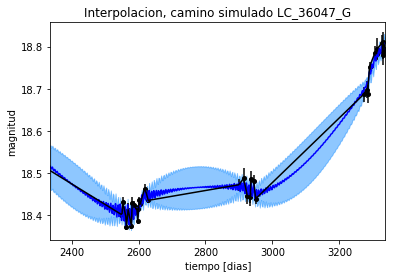

In [11]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_36047_G')

Text(0.5,1,'Interpolacion, camino simulado LC_36047_G')

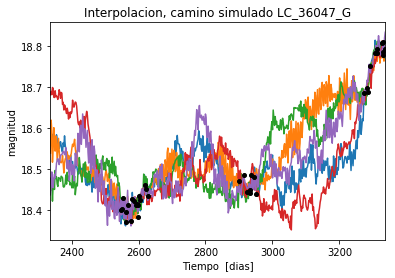

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_36047_G')

In [13]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [14]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 599.092349671
Median: 0.00520840123347
Standard deviation: 0.0508409885225
68% credibility interval: [ 0.00127385  0.01803866]
95% credibility interval: [ 0.0004669  0.0878047]
99% credibility interval: [  3.34786041e-04   3.70753122e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 586.301515735
Median: 0.00520760220749
Standard deviation: 0.0488310422841
68% credibility interval: [ 0.00127385  0.01799982]
95% credibility interval: [ 0.0004669  0.087479 ]
99% credibility interval: [  3.34786041e-04   3.43396472e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 184.964187974
Median: 0.166806522497
Standard deviation: 0.

In [15]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 807.828936367
Median: 149.282667002
Standard deviation: 2.40229708479
68% credibility interval: [ 146.59429003  151.12996758]
95% credibility interval: [ 143.29063977  152.56669438]
99% credibility interval: [ 140.77583986  153.72169016]


In [16]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 244.04285608
Median: 1.21055925399
Standard deviation: 1.9901486013
68% credibility interval: [ 0.32213526  4.38275044]
95% credibility interval: [ 0.05267183  6.56742856]
99% credibility interval: [ 0.03496373  7.77853859]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 245.041400339
Median: 1.87073918033
Standard deviation: 9.07379409502
68% credibility interval: [ 0.80381527  8.72521378]
95% credibility interval: [  0.75895381  29.78

In [17]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 13775.148093
Median: 6.37964673843e-26
Standard deviation: 3.73173845867e+31
68% credibility interval: [  2.05382449e-54   2.10384470e-05]
95% credibility interval: [  5.72068842e-101   7.66572135e+004]
99% credibility interval: [  3.03628598e-102   2.25809914e+010]


In [18]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 640.041450745
Median: 18.6148886994
Standard deviation: 0.0539985682811
68% credibility interval: [ 18.56591275  18.66639074]
95% credibility interval: [ 18.50437226  18.72176227]
99% credibility interval: [ 18.47207335  18.77911682]


In [19]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 262.045187838
Median: 0.176741621246
Standard deviation: 0.219309462042
68% credibility interval: [ 0.14098648  0.43114462]
95% credibility interval: [ 0.13618402  0.86424665]
99% credibility interval: [ 0.12875067  0.91976203]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 262.045187838
Median: 0.176741621246
Standard deviation: 0.219309462042
68% credibility interval: [ 0.14098648  0.43114462]
95% credibility interval: [ 0.13618402  0.86424665]
99% credibility interval: [ 0.12875067  0.91976203]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 126.760022784
Median: 0.0
Standard deviation: 0.000126710786633
68% cred

In [20]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 807.828936367
Median: 149.282667002
Standard deviation: 2.40229708479
68% credibility interval: [ 146.59429003  151.12996758]
95% credibility interval: [ 143.29063977  152.56669438]
99% credibility interval: [ 140.77583986  153.72169016]


In [21]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 367.478807769
Median: 0.0118483348493
Standard deviation: 0.00559055888857
68% credibility interval: [ 0.00850095  0.01728411]
95% credibility interval: [ 0.0064178   0.02678181]
99% credibility interval: [ 0.00521177  0.03971913]


In [22]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 530.46341307
Median: 0.983895618097
Standard deviation: 0.2058599474
68% credibility interval: [ 0.82416227  1.22004765]
95% credibility interval: [ 0.68977346  1.49722504]
99% credibility interval: [ 0.62034267  1.72015141]


In [23]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 106.600255659
Median: 0.015655878293
Standard deviation: 0.249361486993
68% credibility interval: [ 0.00178828  0.16907489]
95% credibility interval: [  7.57914026e-07   9.82139523e-01]
99% credibility interval: [  3.71003764e-12   1.57144841e+00]


In [24]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 599.092349671
Median: (-0.032725350104-1.00514967052j)
Standard deviation: 1.41450461295
68% credibility interval: [-0.11334024-5.45848003j -0.00800383-5.40444548j]
95% credibility interval: [-0.55169322-2.84112268j -0.00293359-0.8881464j ]
99% credibility interval: [ -2.32951057e+00-5.59635194j  -2.10352273e-03-0.88564335j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 586.301515735
Median: (-0.0327203296757+3.16687648408j)
Standard deviation: 1.41170619271
68% credibility interval: [-0.11309620+1.0854865j  -0.00800383+5.40444548j]
95% credibility interval: [-0.54964677+3.88781379j -0.00293359+0.8881464j ]
99% credibility interval: [ -2.15762367e+00+4.10891989j  -2.10352273e-03+0.88564335j]
Posterior summary for par